In [267]:
api_key = '*********************************' # insert API key generated from the twitter scrapers
api_secret = '******************************************' # the 4 keys which have been replaced by '*' will. be generated for youi
access_token = '***************************************' # just replace them with your credentials and the remaining code will run
access_secret = '*************************************'

from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import tweepy
import json
import pandas as pd
import csv
import re
from textblob import TextBlob
import string
import preprocessor as p
import os
import time


In [2]:
def authenticator(api_key,api_secret,access_token, access_secret):
    auth = OAuthHandler(api_key, api_secret)
    auth.set_access_token(access_token, access_secret)
    api = tweepy.API(auth)
    return api

In [3]:
api = authenticator(api_key,api_secret,access_token, access_secret)

In [13]:
def scraptweets(search_words, date_since, numTweets, numRuns):
    db_tweets = pd.DataFrame(columns = ['username', 'acctdesc', 'location', 'following','followers', 'totaltweets', 'usercreatedts', 'tweetcreatedts','retweetcount', 'text', 'hashtags'])
    program_start = time.time()
    for i in range(0, numRuns):
        start_run = time.time()
        tweets = tweepy.Cursor(api.search, q=search_words, lang="en", since=date_since, tweet_mode='extended').items(numTweets)
        tweet_list = [tweet for tweet in tweets]
        noTweets = 0
        for tweet in tweet_list:
            username = tweet.user.screen_name
            acctdesc = tweet.user.description
            location = tweet.user.location
            following = tweet.user.friends_count
            followers = tweet.user.followers_count
            totaltweets = tweet.user.statuses_count
            usercreatedts = tweet.user.created_at
            tweetcreatedts = tweet.created_at
            retweetcount = tweet.retweet_count
            hashtags = tweet.entities['hashtags']
            try:
                text = tweet.retweeted_status.full_text
            except AttributeError: 
                text = tweet.full_text
            ith_tweet = [username, acctdesc, location, following, followers, totaltweets,
                         usercreatedts, tweetcreatedts, retweetcount, text, hashtags]
            db_tweets.loc[len(db_tweets)] = ith_tweet
            noTweets += 1
        
        end_run = time.time()
        duration_run = round((end_run-start_run)/60, 2)
        
        print('no. of tweets scraped for run {} is {}'.format(i + 1, noTweets))
        print('time take for {} run to complete is {} mins'.format(i+1, duration_run))
        
        time.sleep(920) 
    from datetime import datetime
    to_csv_timestamp = datetime.today().strftime('%Y%m%d_%H%M%S')
    path = '/Users/sahajshukla/Desktop'
    filename = path + 'covid19_tweets.csv'
    db_tweets.to_csv(filename, index = False)
    
    program_end = time.time()
    print('Scraping has completed!')
    print('Total time taken to scrap is {} minutes.'.format(round(program_end - program_start)/60, 2))

In [14]:
#var = scraptweets('covid-19', '1212021', 20, 1)

In [15]:
# Initialise these variables:
search_words = "#covid OR #covid19 OR #coronavirus OR #corona OR #pandemic OR #flattenthecurve"
date_since = "2021-1-12"
numTweets = 2500
numRuns = 6
# Call the function scraptweets
var1= scraptweets(search_words, date_since, numTweets, numRuns)

no. of tweets scraped for run 1 is 2500
time take for 1 run to complete is 1.36 mins
no. of tweets scraped for run 2 is 2500
time take for 2 run to complete is 1.45 mins
no. of tweets scraped for run 3 is 2500
time take for 3 run to complete is 1.51 mins
no. of tweets scraped for run 4 is 2500
time take for 4 run to complete is 1.63 mins
no. of tweets scraped for run 5 is 2500
time take for 5 run to complete is 1.64 mins
no. of tweets scraped for run 6 is 2500
time take for 6 run to complete is 1.69 mins
Scraping has completed!
Total time taken to scrap is 149.8 minutes.


In [19]:
import numpy as np
import pandas as pd

In [20]:
df = pd.read_csv('Desktop/covid19_tweets.csv')

In [22]:
df = df['text']

In [23]:
df

0        @TheBelieverJC Amen\n\n#Akhirzaman\n#Endtimes\...
1        Our new vaccine provider tool shows locations ...
2        Amen\n\n#Akhirzaman\n#Endtimes\n#BibleProphecy...
3         2020 shouldn't be include to our age\n\n#COVID19
4        My friend's dad recently tested positive. Inte...
                               ...                        
14995    Joe Biden's immediate #coronavirus priorities ...
14996    Happy New week from YamBarn... \n#MondayMotiva...
14997    Happy New week from YamBarn... \n#MondayMotiva...
14998    New Brunswick struggles to contain latest surg...
14999    Happy New week from YamBarn... \n#MondayMotiva...
Name: text, Length: 15000, dtype: object

In [132]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize 
import re
from nltk.corpus import stopwords

In [133]:
def clean_tweet(this):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", this).split())

In [134]:
array1 = []
for i in df:
    array1.append(clean_tweet(i))

In [266]:
#pd.options.display.max_columns
array1.iloc[1,:]

tweets    [new, vaccine, provider, tool, shows, location...
Name: 1, dtype: object

In [136]:
array1 = pd.DataFrame(array1)

In [137]:
array1

,0
0,Amen Akhirzaman Endtimes BibleProphecy Gereja ...
1,Our new vaccine provider tool shows locations ...
2,Amen Akhirzaman Endtimes BibleProphecy Gereja ...
3,2020 shouldn t be include to our age COVID19
4,My friend s dad recently tested positive Inter...
...,...
14995,Joe Biden s immediate coronavirus priorities a...
14996,Happy New week from YamBarn MondayMotivation m...
14997,Happy New week from YamBarn MondayMotivation m...
14998,New Brunswick struggles to contain latest surg...


In [138]:
stop = stopwords.words('english')

In [139]:
array1.shape

(15000, 1)

In [140]:
array1.apply(lambda x: 'this')

0    this
dtype: object

In [141]:
array1.apply(lambda x: [item for item in x if item not in stop])

,0
0,Amen Akhirzaman Endtimes BibleProphecy Gereja ...
1,Our new vaccine provider tool shows locations ...
2,Amen Akhirzaman Endtimes BibleProphecy Gereja ...
3,2020 shouldn t be include to our age COVID19
4,My friend s dad recently tested positive Inter...
...,...
14995,Joe Biden s immediate coronavirus priorities a...
14996,Happy New week from YamBarn MondayMotivation m...
14997,Happy New week from YamBarn MondayMotivation m...
14998,New Brunswick struggles to contain latest surg...


In [142]:
array1 = array1.rename(columns={0:'tweets'})

In [143]:
array1

,tweets
0,Amen Akhirzaman Endtimes BibleProphecy Gereja ...
1,Our new vaccine provider tool shows locations ...
2,Amen Akhirzaman Endtimes BibleProphecy Gereja ...
3,2020 shouldn t be include to our age COVID19
4,My friend s dad recently tested positive Inter...
...,...
14995,Joe Biden s immediate coronavirus priorities a...
14996,Happy New week from YamBarn MondayMotivation m...
14997,Happy New week from YamBarn MondayMotivation m...
14998,New Brunswick struggles to contain latest surg...


In [144]:
array1["tweets"] = array1["tweets"].str.lower().str.split()
array1 = array1['tweets'].apply(lambda x: [item for item in x if item not in stop])

In [145]:
array1

0        [amen, akhirzaman, endtimes, bibleprophecy, ge...
1        [new, vaccine, provider, tool, shows, location...
2        [amen, akhirzaman, endtimes, bibleprophecy, ge...
3                            [2020, include, age, covid19]
4        [friend, dad, recently, tested, positive, inte...
                               ...                        
14995    [joe, biden, immediate, coronavirus, prioritie...
14996    [happy, new, week, yambarn, mondaymotivation, ...
14997    [happy, new, week, yambarn, mondaymotivation, ...
14998    [new, brunswick, struggles, contain, latest, s...
14999    [happy, new, week, yambarn, mondaymotivation, ...
Name: tweets, Length: 15000, dtype: object

In [146]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [149]:
array1 = pd.DataFrame(array1)


In [150]:
array1

,tweets
0,"[amen, akhirzaman, endtimes, bibleprophecy, ge..."
1,"[new, vaccine, provider, tool, shows, location..."
2,"[amen, akhirzaman, endtimes, bibleprophecy, ge..."
3,"[2020, include, age, covid19]"
4,"[friend, dad, recently, tested, positive, inte..."
...,...
14995,"[joe, biden, immediate, coronavirus, prioritie..."
14996,"[happy, new, week, yambarn, mondaymotivation, ..."
14997,"[happy, new, week, yambarn, mondaymotivation, ..."
14998,"[new, brunswick, struggles, contain, latest, s..."


In [151]:
arr2 = []
for i in array1['tweets']:
    arr1 = []
    for j in i:
        j = stemmer.stem(j)
        arr1.append(j)
    arr2.append(arr1)

In [171]:
from gensim import corpora, models, similarities, downloader
import gensim

In [220]:
 model = gensim.models.Word2Vec(arr2,min_count=1, size = 32)

In [221]:
model.most_similar('covid19')

/opt/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('soundup', 0.7500971555709839),
 ('elabor', 0.741153359413147),
 ('zerocovid', 0.730138897895813),
 ('anticip', 0.7261486053466797),
 ('covishield', 0.7243441939353943),
 ('inocul', 0.723292887210846),
 ('vaccinationdr', 0.7201719284057617),
 ('log', 0.7179169654846191),
 ('powerisyour', 0.7130990028381348),
 ('unbias', 0.7104071378707886)]

('newstrainofcoronaviru', 0.7015031576156616) and ('covid19vaccin', 0.6855109333992004) shows that the worls is most concerned about the new strain of covid-19 virus and covid vaccines lately


In [222]:
model.most_similar('death')

/opt/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('175', 0.938687801361084),
 ('heat', 0.9268056750297546),
 ('surpass', 0.926115095615387),
 ('041', 0.9208394289016724),
 ('exce', 0.9202182292938232),
 ('rate', 0.9147425293922424),
 ('highest', 0.9109095335006714),
 ('398', 0.9056347608566284),
 ('002', 0.9015560746192932),
 ('202', 0.8991591930389404)]

Talking about death, most tweets seem to be facts based. Exceed and surpassed being the only texts often used with death, the others are just numbers

In [223]:
model.most_similar('india')

/opt/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('covid19vaccin', 0.9050557017326355),
 ('coronaviruspandem', 0.9011415839195251),
 ('streak', 0.892388641834259),
 ('glitch', 0.8908182978630066),
 ('pan', 0.8798413276672363),
 ('coronasafetytip', 0.8714830279350281),
 ('largestvaccinationdr', 0.8695726990699768),
 ('covishield', 0.8621368408203125),
 ('indiafightscorona', 0.8602380156517029),
 ('inocul', 0.8582554459571838)]

In [224]:
model.most_similar('usa')

/opt/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('healthministri', 0.9304147958755493),
 ('itali', 0.9198288917541504),
 ('20k', 0.914466142654419),
 ('pakistan', 0.9102131724357605),
 ('dy365', 0.9081410765647888),
 ('110', 0.9073655009269714),
 ('franc', 0.9021708965301514),
 ('194', 0.9007587432861328),
 ('leap', 0.898230791091919),
 ('042', 0.8973006010055542)]

In [225]:
model.most_similar('spread')

/opt/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('slow', 0.9057726860046387),
 ('measur', 0.893132209777832),
 ('stop', 0.8751460313796997),
 ('prevent', 0.8667067885398865),
 ('takerespons', 0.8103840351104736),
 ('cgtn', 0.8066921234130859),
 ('vermin', 0.8064451217651367),
 ('curtail', 0.8043041229248047),
 ('indoor', 0.8037985563278198),
 ('precaut', 0.7995473742485046)]

In [249]:
model.most_similar('vaccin')

/opt/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('moderna', 0.8708730936050415),
 ('sinovac', 0.864195704460144),
 ('biontech', 0.8539444208145142),
 ('sight', 0.8464689254760742),
 ('receiv', 0.8428606986999512),
 ('dose', 0.8386792540550232),
 ('brazilian', 0.8384666442871094),
 ('jab', 0.8369552493095398),
 ('sclerosi', 0.8330541253089905),
 ('aarogyasetu', 0.8276796936988831)]

In [227]:
model.save("covid19_tweet_model")

In [228]:
from sklearn.manifold import TSNE

In [235]:
import matplotlib.pyplot as plt

In [247]:
def display_closestwords_tsnescatterplot(model, word):
    arr = np.empty((0,32), dtype='f')
    word_labels = [word]
    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+50, x_coords.max()+50)
    plt.ylim(y_coords.min()+100, y_coords.max()+100)
    plt.show()
        

/opt/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  after removing the cwd from sys.path.
/opt/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/opt/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


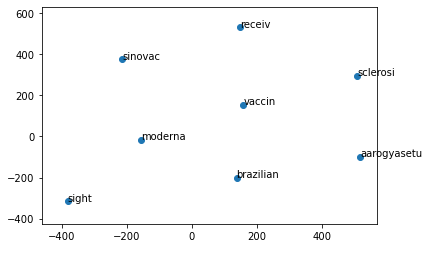

In [250]:
display_closestwords_tsnescatterplot(model, 'vaccin')